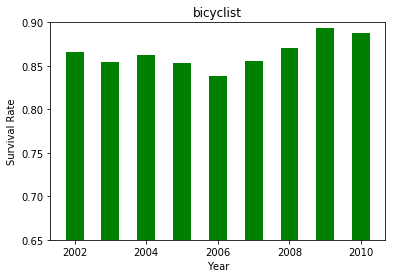

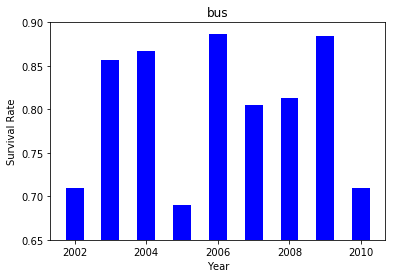

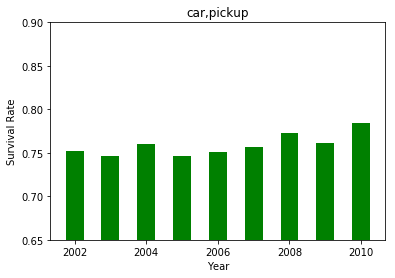

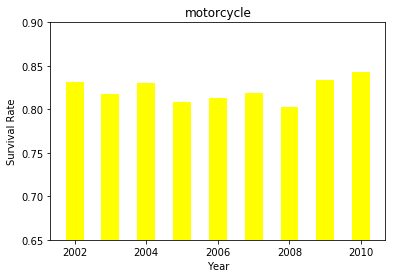

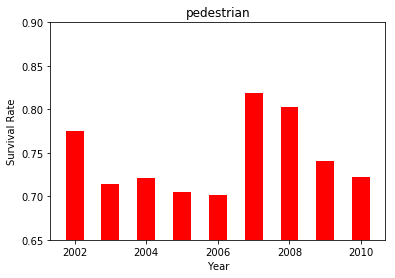

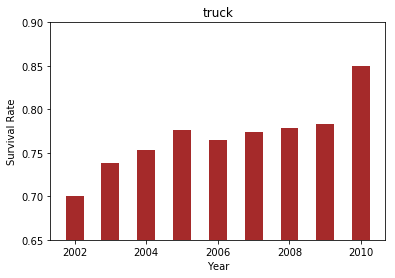

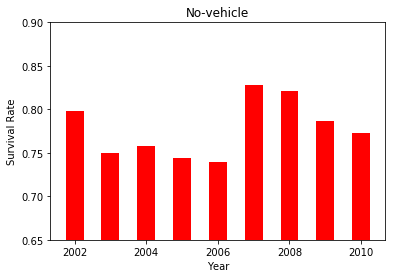

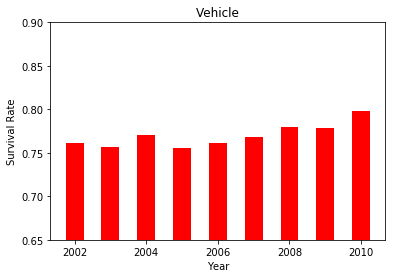

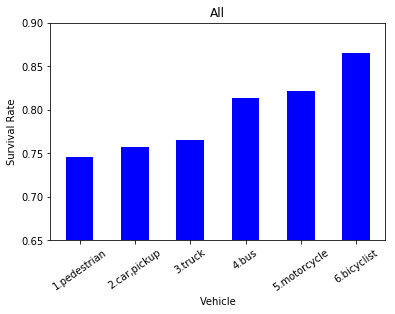

In [ ]:
import numpy as np    
import matplotlib.mlab as mlab    
import matplotlib.pyplot as plt   
import xlrd
import random
import pandas as pd

def plot_picture(cols_x,cols_y,xlabel,ylabel,title):
    assert isinstance(cols_x,list)
    assert isinstance(cols_y,list)
    X=cols_x[i]
    Y=cols_y[i]   
    fig = plt.figure()  
    plt.ylim(0.65,0.9)
    plt.bar(X,Y,0.5,color=random.choice(color_chioce))  
    plt.xlabel(xlabel)  
    plt.ylabel(ylabel)  
    plt.title(title)  
    plt.show()
    plt.savefig("SR.jpg")
    
    

workbook = xlrd.open_workbook('/Users/apple/Desktop/bicyclist SR.xlsx')
sheet_name_list = workbook.sheet_names()
cols_x = []
cols_y = []
color_chioce = ['green','red','blue','yellow','orange','purple','brown']
for i in range(len(sheet_name_list)):
    current_sheet = workbook.sheet_by_name(sheet_name_list[i])
    cols_x.append(current_sheet.col_values(0)[1:])
    cols_y.append(current_sheet.col_values(4)[1:])    

for i in range(len(sheet_name_list)):
    plot_picture(cols_x,cols_y,'Year','Survival Rate',sheet_name_list[i])
    

    
def calculate_value(sheet_name):
    assert isinstance(sheet_name,list)
    y = []
    rows = workbook.sheet_by_name(sheet_name[0]).nrows
    survival = 0
    total = 0   
    for i in range(rows-1):
        for j in sheet_name:
            survival += workbook.sheet_by_name(j).col_values(2)[1:][i]
            total += workbook.sheet_by_name(j).col_values(3)[1:][i]
        rate = survival/total
        y.append(rate)
        survival = 0
        total = 0
    return y

def calculate_all(sheet_name):
    y = []
    rows = workbook.sheet_by_name(sheet_name[0]).nrows
    survival = 0
    total = 0 
    for i in sheet_name:
        for j in range(rows-1):
            survival += workbook.sheet_by_name(i).col_values(2)[1:][j]
            total += workbook.sheet_by_name(i).col_values(3)[1:][j]
        rate = survival/total
        y.append(rate)
        survival = 0
        total = 0
    return y

#No-vehicle
sheet_name_no_vehicle = []
sheet_name_no_vehicle.append(workbook.sheet_names()[0])
sheet_name_no_vehicle.append(workbook.sheet_names()[4])
cols_y_no_vehicle = calculate_value(sheet_name_no_vehicle)
X=cols_x[i]
Y=cols_y_no_vehicle
fig = plt.figure()  
plt.ylim(0.65,0.9)
plt.bar(X,Y,0.5,color=random.choice(color_chioce))  
plt.xlabel('Year')  
plt.ylabel('Survival Rate')  
plt.title('No-vehicle')  
plt.show()  
plt.savefig("SR.jpg")

#Vehicle
sheet_name_vehicle = []
sheet_name_vehicle.append(workbook.sheet_names()[1])
sheet_name_vehicle.append(workbook.sheet_names()[2])
sheet_name_vehicle.append(workbook.sheet_names()[3])
sheet_name_vehicle.append(workbook.sheet_names()[5])
cols_y_vehicle = calculate_value(sheet_name_vehicle)
X=cols_x[i]
Y=cols_y_vehicle
fig = plt.figure()  
plt.ylim(0.65,0.9)
plt.bar(X,Y,0.5,color=random.choice(color_chioce))  
plt.xlabel('Year')  
plt.ylabel('Survival Rate')  
plt.title('Vehicle')  
plt.show()  
plt.savefig("SR.jpg")

#All
cols_x_all = sheet_name_list
cols_y_all = calculate_all(sheet_name_list)
df = pd.DataFrame(cols_x_all,index = cols_y_all,columns = ['A'])
order = sorted(cols_y_all)
df = df.reindex(order)
new_x = list(df['A'])
cols_x_all = new_x
cols_y_all = order
number_list = ['1.','2.','3.','4.','5.','6.']
for i in range(len(cols_x_all)):
    cols_x_all[i] = number_list[i] + cols_x_all[i]



    
X=cols_x_all
Y=cols_y_all     
fig = plt.figure()  
plt.ylim(0.65,0.9)
plt.bar(X,Y,0.5,color=random.choice(color_chioce))  
plt.xticks(rotation=35)
plt.xlabel('Vehicle')  
plt.ylabel('Survival Rate')  
plt.title('All')  
plt.show()          













    
    

    
